# Практическое задание №2 по ОММ

## Вариант 27

### Выполнила студент 322 группы Салыкина Дария

## Постановка задачи

Используя метод переменных направлений, решите задачу:
$$
\begin{cases}
\frac{\partial u}{\partial t} = \Delta u + \sin2\pi x e^{-t}, 0<x<1, 0<y<1, t>0\\
u|_{x=0} = u|_{x=1} = 0,\\
\frac{\partial u}{\partial y}\bigg|_{y=0} = \frac{\partial u}{\partial y}\bigg|_{y=1} = 0,\\
u = \sin 2\pi x
\end{cases}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm

In [2]:
Nx = 60
Ny = 60
M = 30
T = 1
x = np.linspace(0,1,Nx)
y = np.linspace(0, 1, Ny)
t = np.linspace(0,T,M)
h_x = x[1] - x[0]
h_y = y[1] - y[0]
tau = t[1] - t[0]
gamma_x = tau / h_x**2
gamma_y = tau / h_y**2
u = np.zeros((Nx, Ny, 2 * M + 1))

In [3]:
def F_1(i1, i2, j):
    return 0.5 * gamma_y * (u[i1,i2-1,j-1] + u[i1, i2+1,j-1]) + (1 - gamma_y) * u[i1,i2,j-1] + 0.5 * tau * np.exp(-tau * (j+1)/2) * np.sin(2*np.pi*x[i1])
def F_2(i1, i2, j):
    return 0.5 * gamma_x * (u[i1-1,i2,j-1] + u[i1+1, i2,j-1]) + (1 - gamma_x) * u[i1,i2,j-1] + 0.5 * tau * np.exp(-tau * (j-1)/2) * np.sin(2*np.pi*x[i1])
def progonka_x(i2,j):
    d = np.zeros(Nx)
    sigma = np.zeros(Nx)
    d[1] = 0
    sigma[1]=0
    A = 0.5 * gamma_x
    B = 1 + gamma_x
    C = 0.5 * gamma_x
    for m in range(1, Nx-1):
        Fm = -F_1(m,i2,j)
        d[m+1] = C / (B - A * d[m])
        sigma[m+1] = (Fm - A*sigma[m])/(A * d[m] - B)
    u[Nx-1,i2,j] =0
    for m in range(Nx-1,0,-1):
        u[m-1,i2,j] = d[m] * u[m,i2,j] + sigma[m]
        
def progonka_y(i1, j):
    d = np.zeros(Ny)
    sigma = np.zeros(Ny)
    d[1] = 1
    sigma[1] = 0
    A = 0.5 * gamma_y
    B = 1 + gamma_y
    C = 0.5 * gamma_y
    for m in range(1, Ny-1):
        Fm = -F_2(i1,m-1,j)
        d[m+1] = C / (B - A * d[m])
        sigma[m+1] = (Fm - A*sigma[m])/(A * d[m] - B)
    u[i1,Ny-1,j] = sigma[-1] / (1 - d[-1])
    for m in range(Ny-1,0,-1):
        u[i1,m-1,j] = d[m] * u[i1,m,j] + sigma[m]

In [4]:
u[:,:,0] = np.sin(2*np.pi*x)

In [5]:
for j in tqdm.tqdm_notebook(range(1,2*M,2)):
    for i2 in range(1, Ny-1):
        progonka_x(i2,j)
    for i1 in range(1,Nx-1):
        progonka_y(i1,j+1)

C:\Users\ty\Documents\ВУЗ\6 семестр\ОММ\Прога\WPy64-3770\python-3.7.7.amd64\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Значение функции u')

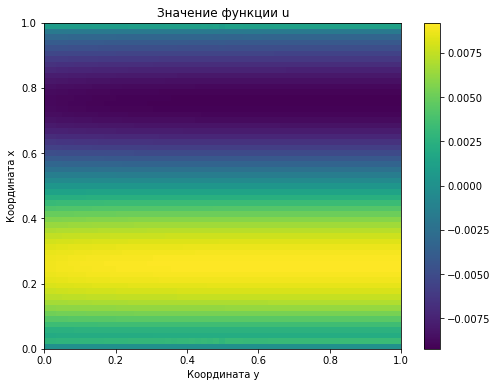

In [6]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,u[:,:,-1])
plt.colorbar()
plt.ylabel('Координата х')
plt.xlabel('Координата y')
plt.title('Значение функции u')

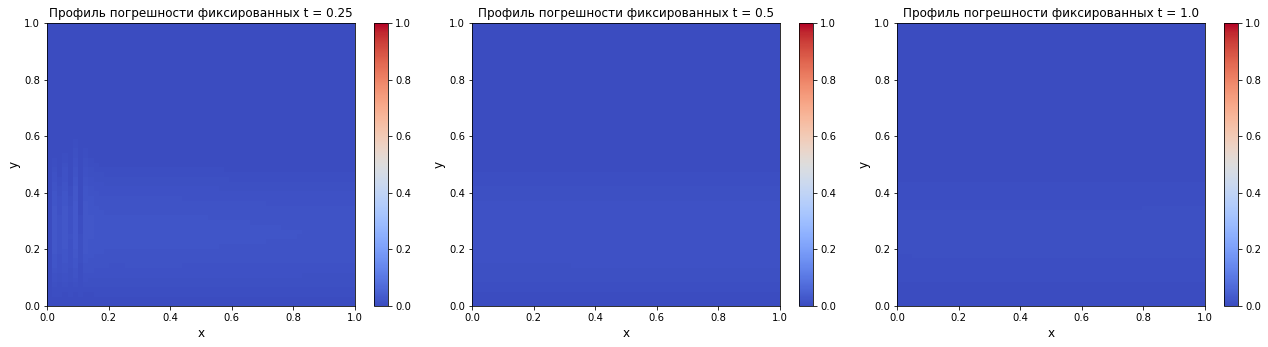

In [7]:
times = [0.25,0.5,1.]
fig = plt.figure(figsize=(18,9))
for i in range(len(times)):
    plt.subplot(2, 3, i+1)
    r = int(times[i]/T*(2*M))
    plt.pcolormesh(y,x,u[:,:,r],cmap = 'coolwarm', vmin = 0, vmax = 1)
    plt.colorbar()
    plt.xlabel('x', fontsize = 12)
    plt.ylabel('y', fontsize = 12)
    plt.title('Профиль погрешности фиксированных t = '+str(times[i]))
plt.tight_layout()


ValueError: Argument Z must be 2-dimensional.

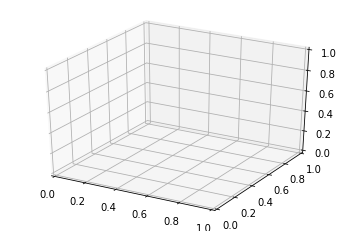

In [8]:
#3D график
fig = plt.figure()
ax = fig.gca(projection='3d')
t, x = np.meshgrid(t,x)

surf = ax.plot_surface(x,t,y,cmap='summer')
plt.ylabel('t')
plt.xlabel('x')
plt.title('Численное решение')